<a href="https://colab.research.google.com/github/flazy2222/sf_data_science/blob/main/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_3_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Шаг 1: Загрузка данных и начальная информация о DataFrame

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
# Загружаем файлы из Google диска
lectures = pd.read_csv('/content/drive/MyDrive/lectures.csv')
questions = pd.read_csv('/content/drive/MyDrive/questions.csv')
train = pd.read_csv('/content/drive/MyDrive/train.csv', nrows=10000000)
# Смотрим на 5 первых строк
train.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False


In [17]:
questions.head()

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


In [18]:
lectures.head()

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question


In [19]:
# Смотрим размерность наших df
train.shape

(10000000, 10)

In [20]:
questions.shape

(13523, 5)

In [21]:
lectures.shape

(418, 4)

In [22]:
# Смотрим информацию о нашем df
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       int64  
 2   user_id                         int64  
 3   content_id                      int64  
 4   content_type_id                 int64  
 5   task_container_id               int64  
 6   user_answer                     int64  
 7   answered_correctly              int64  
 8   prior_question_elapsed_time     float64
 9   prior_question_had_explanation  object 
dtypes: float64(1), int64(8), object(1)
memory usage: 762.9+ MB


In [23]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int64 
 1   bundle_id       13523 non-null  int64 
 2   correct_answer  13523 non-null  int64 
 3   part            13523 non-null  int64 
 4   tags            13522 non-null  object
dtypes: int64(4), object(1)
memory usage: 528.4+ KB


In [24]:
lectures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int64 
 1   tag         418 non-null    int64 
 2   part        418 non-null    int64 
 3   type_of     418 non-null    object
dtypes: int64(3), object(1)
memory usage: 13.2+ KB


In [25]:
# Статистическое описание числовых данных в df
train.describe()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
count,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,9.765216e+06
mean,5.000000e+06,7.546528e+09,1.079943e+08,5.209509e+03,1.953960e-02,8.776194e+02,1.376462e+00,6.262029e-01,2.547559e+04
std,2.886751e+06,1.141381e+10,6.311024e+07,3.867783e+03,1.384117e-01,1.334407e+03,1.193603e+00,5.226395e-01,1.995033e+04
min,0.000000e+00,0.000000e+00,1.150000e+02,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00
25%,2.500000e+06,5.109600e+08,5.398177e+07,2.059000e+03,0.000000e+00,1.020000e+02,0.000000e+00,0.000000e+00,1.600000e+04
50%,5.000000e+06,2.612310e+09,1.067638e+08,5.016000e+03,0.000000e+00,3.710000e+02,1.000000e+00,1.000000e+00,2.100000e+04
75%,7.499999e+06,9.751909e+09,1.630735e+08,7.402000e+03,0.000000e+00,1.055000e+03,3.000000e+00,1.000000e+00,2.966600e+04
max,9.999999e+06,8.470816e+10,2.167479e+08,3.273600e+04,1.000000e+00,9.999000e+03,3.000000e+00,1.000000e+00,3.000000e+05


In [26]:
questions.describe()

,question_id,bundle_id,correct_answer,part
count,13523.00000,13523.000000,13523.000000,13523.000000
mean,6761.00000,6760.510907,1.455298,4.264956
std,3903.89818,3903.857783,1.149707,1.652553
min,0.00000,0.000000,0.000000,1.000000
25%,3380.50000,3379.500000,0.000000,3.000000
50%,6761.00000,6761.000000,1.000000,5.000000
75%,10141.50000,10140.000000,3.000000,5.000000
max,13522.00000,13522.000000,3.000000,7.000000


In [27]:
lectures.describe()

,lecture_id,tag,part
count,418.000000,418.000000,418.000000
mean,16983.401914,94.480861,4.267943
std,9426.164660,53.586487,1.872424
min,89.000000,0.000000,1.000000
25%,9026.250000,50.250000,2.000000
50%,17161.500000,94.500000,5.000000
75%,24906.250000,140.000000,6.000000
max,32736.000000,187.000000,7.000000


In [28]:
 # Количество пропущенных значений в train
print(train.isnull().sum())

row_id                                 0
timestamp                              0
user_id                                0
content_id                             0
content_type_id                        0
task_container_id                      0
user_answer                            0
answered_correctly                     0
prior_question_elapsed_time       234784
prior_question_had_explanation     39388
dtype: int64


In [29]:
# Замена NaN на 0
train['prior_question_elapsed_time'].fillna(0, inplace=True)

<ipython-input-29-e7b89f110326>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['prior_question_elapsed_time'].fillna(0, inplace=True)


In [30]:
# Объединение данных вопросов и лекций с основной таблицей
train = pd.merge(train, questions, how='left', left_on='content_id', right_on='question_id', suffixes=('', '_question'))
train = pd.merge(train, lectures, how='left', left_on='content_id', right_on='lecture_id', suffixes=('', '_lecture'))


In [31]:
train.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,question_id,bundle_id,correct_answer,part,tags,lecture_id,tag,part_lecture,type_of
0,0,0,115,5692,0,1,3,1,0.0,NaN,5692.0,5692.0,3.0,5.0,151,NaN,NaN,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False,5716.0,5716.0,2.0,5.0,168,NaN,NaN,NaN,NaN
2,2,118363,115,128,0,0,0,1,55000.0,False,128.0,128.0,0.0,1.0,131 149 92,NaN,NaN,NaN,NaN
3,3,131167,115,7860,0,3,0,1,19000.0,False,7860.0,7860.0,0.0,1.0,131 104 81,NaN,NaN,NaN,NaN
4,4,137965,115,7922,0,4,1,1,11000.0,False,7922.0,7922.0,1.0,1.0,131 149 92,NaN,NaN,NaN,NaN


# Шаг 2: Распределение переменных


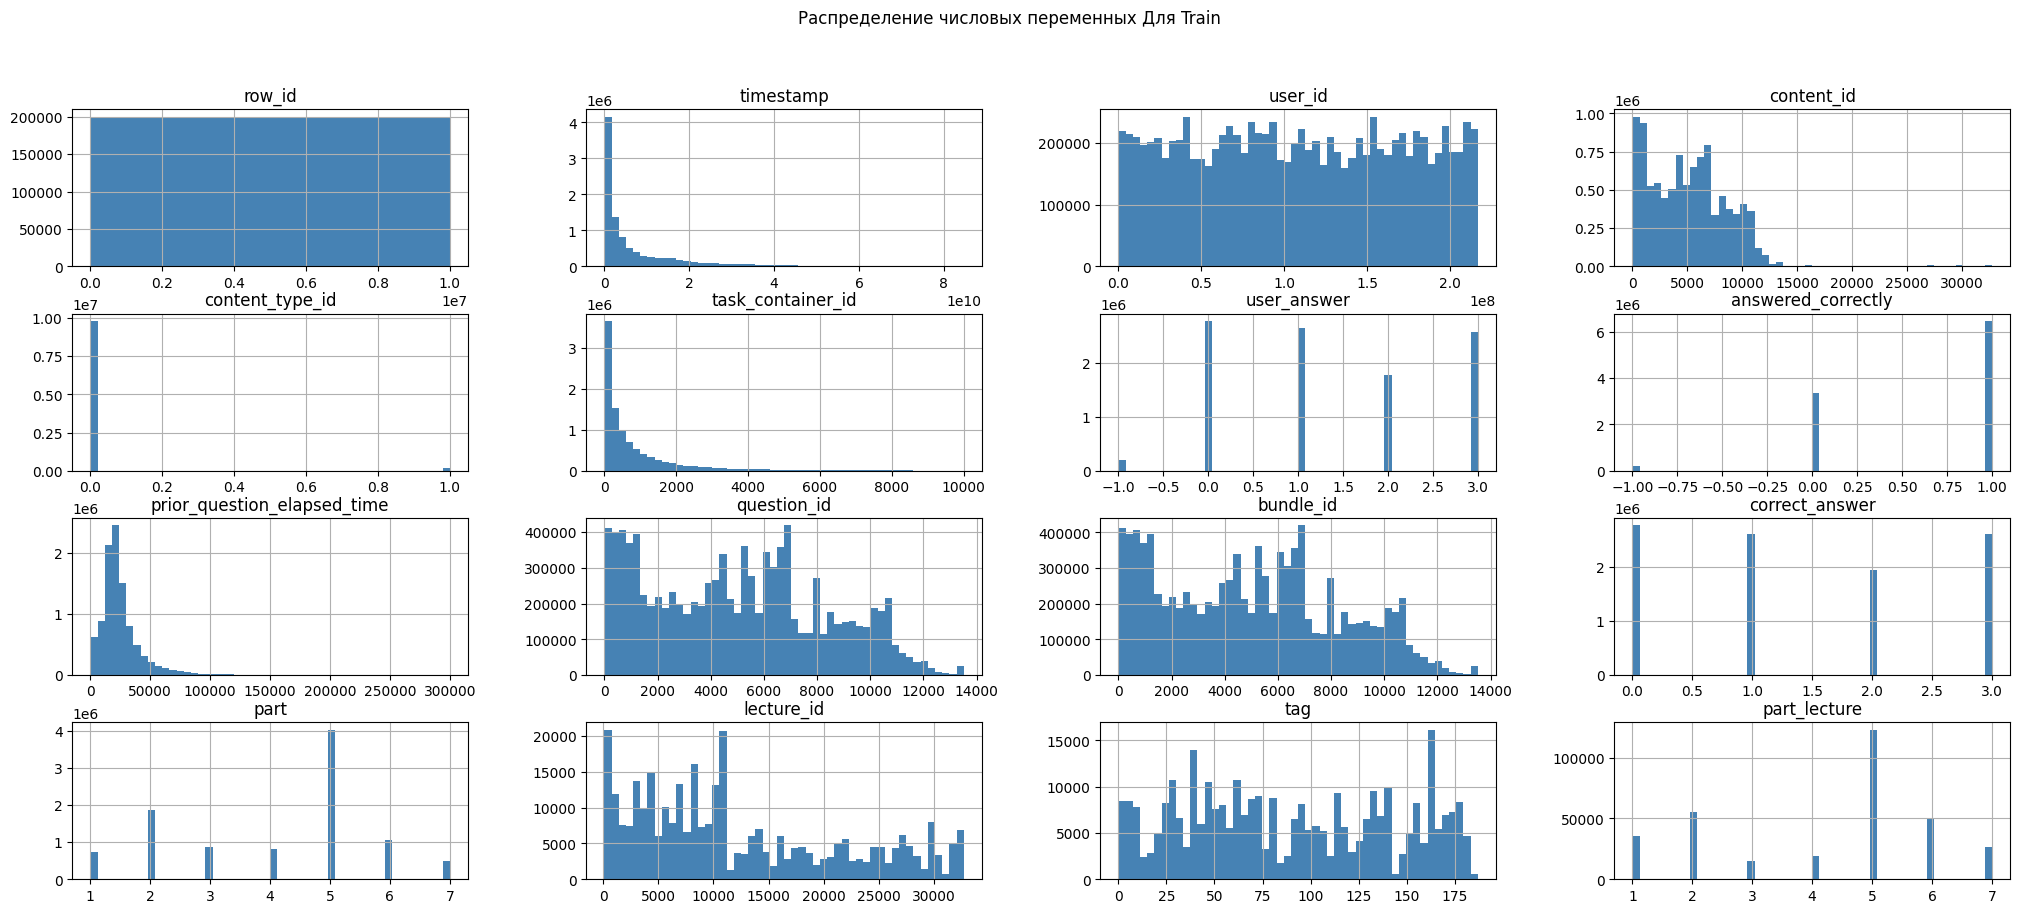

In [68]:
train.hist(bins=50, figsize=(25, 10), color='steelblue')
plt.suptitle('Распределение числовых переменных Для Train')
plt.show()

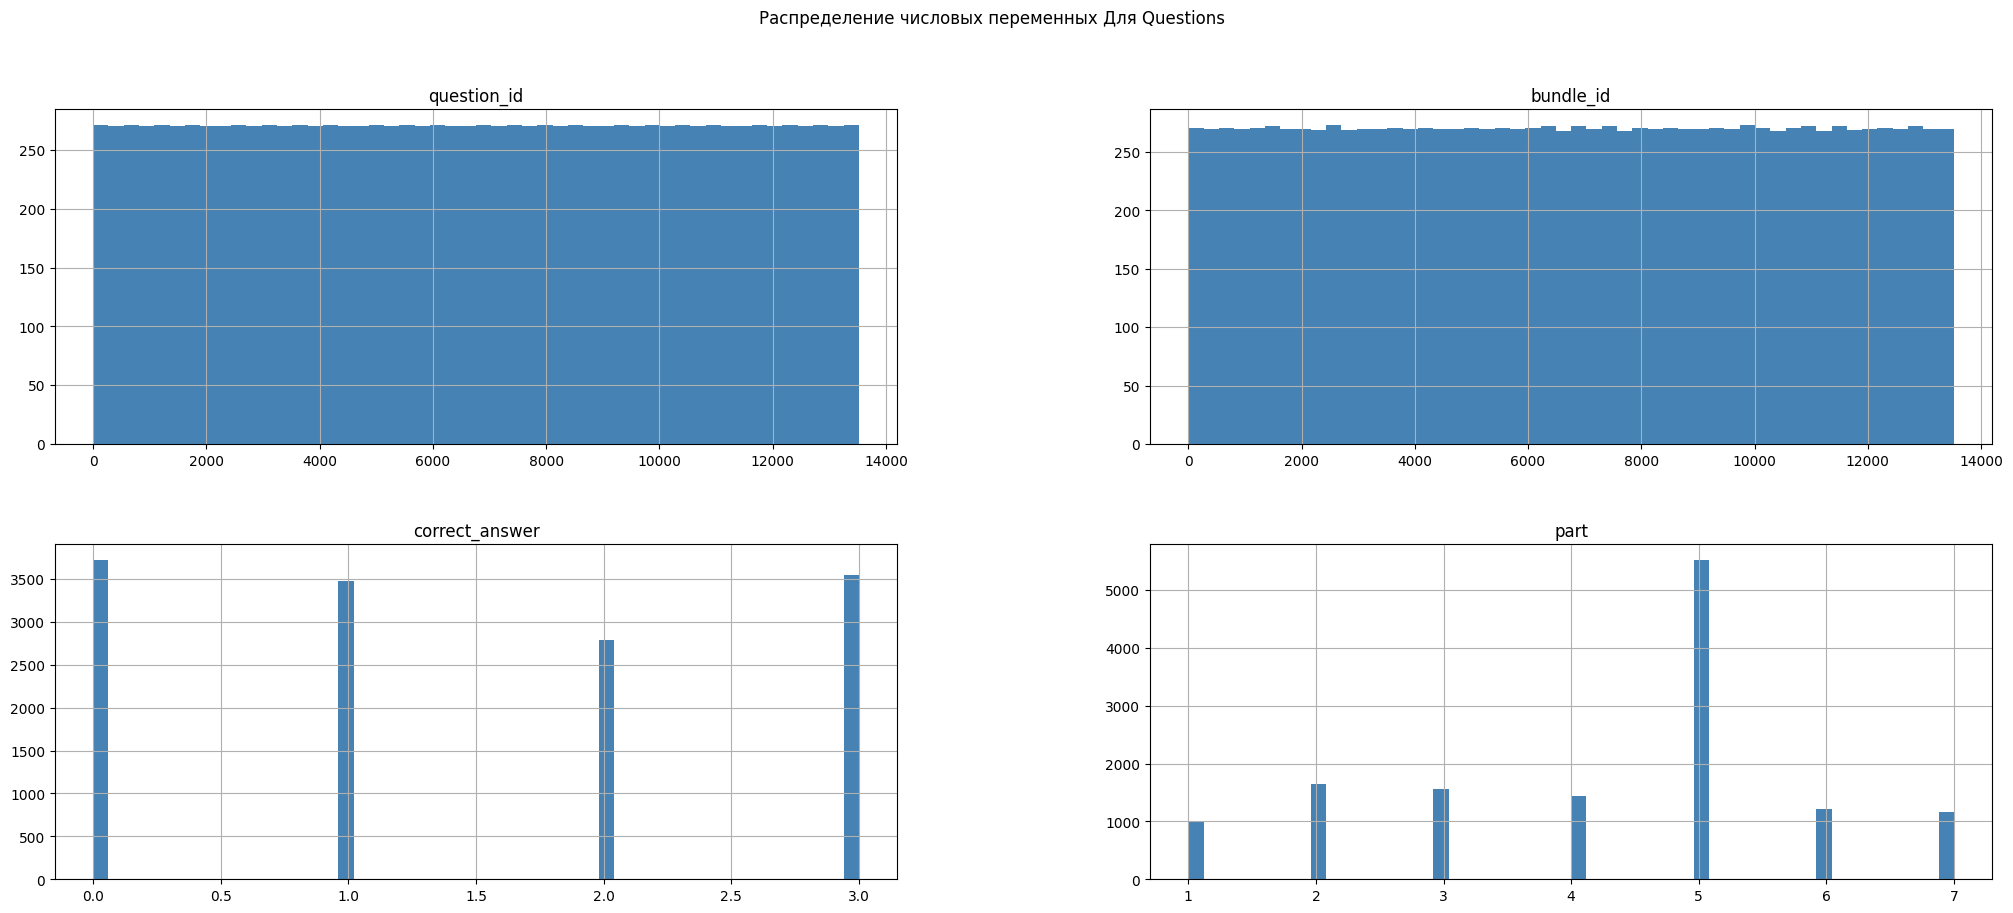

In [69]:
questions.hist(bins=50, figsize=(25, 10), color='steelblue')
plt.suptitle('Распределение числовых переменных Для Questions')
plt.show()

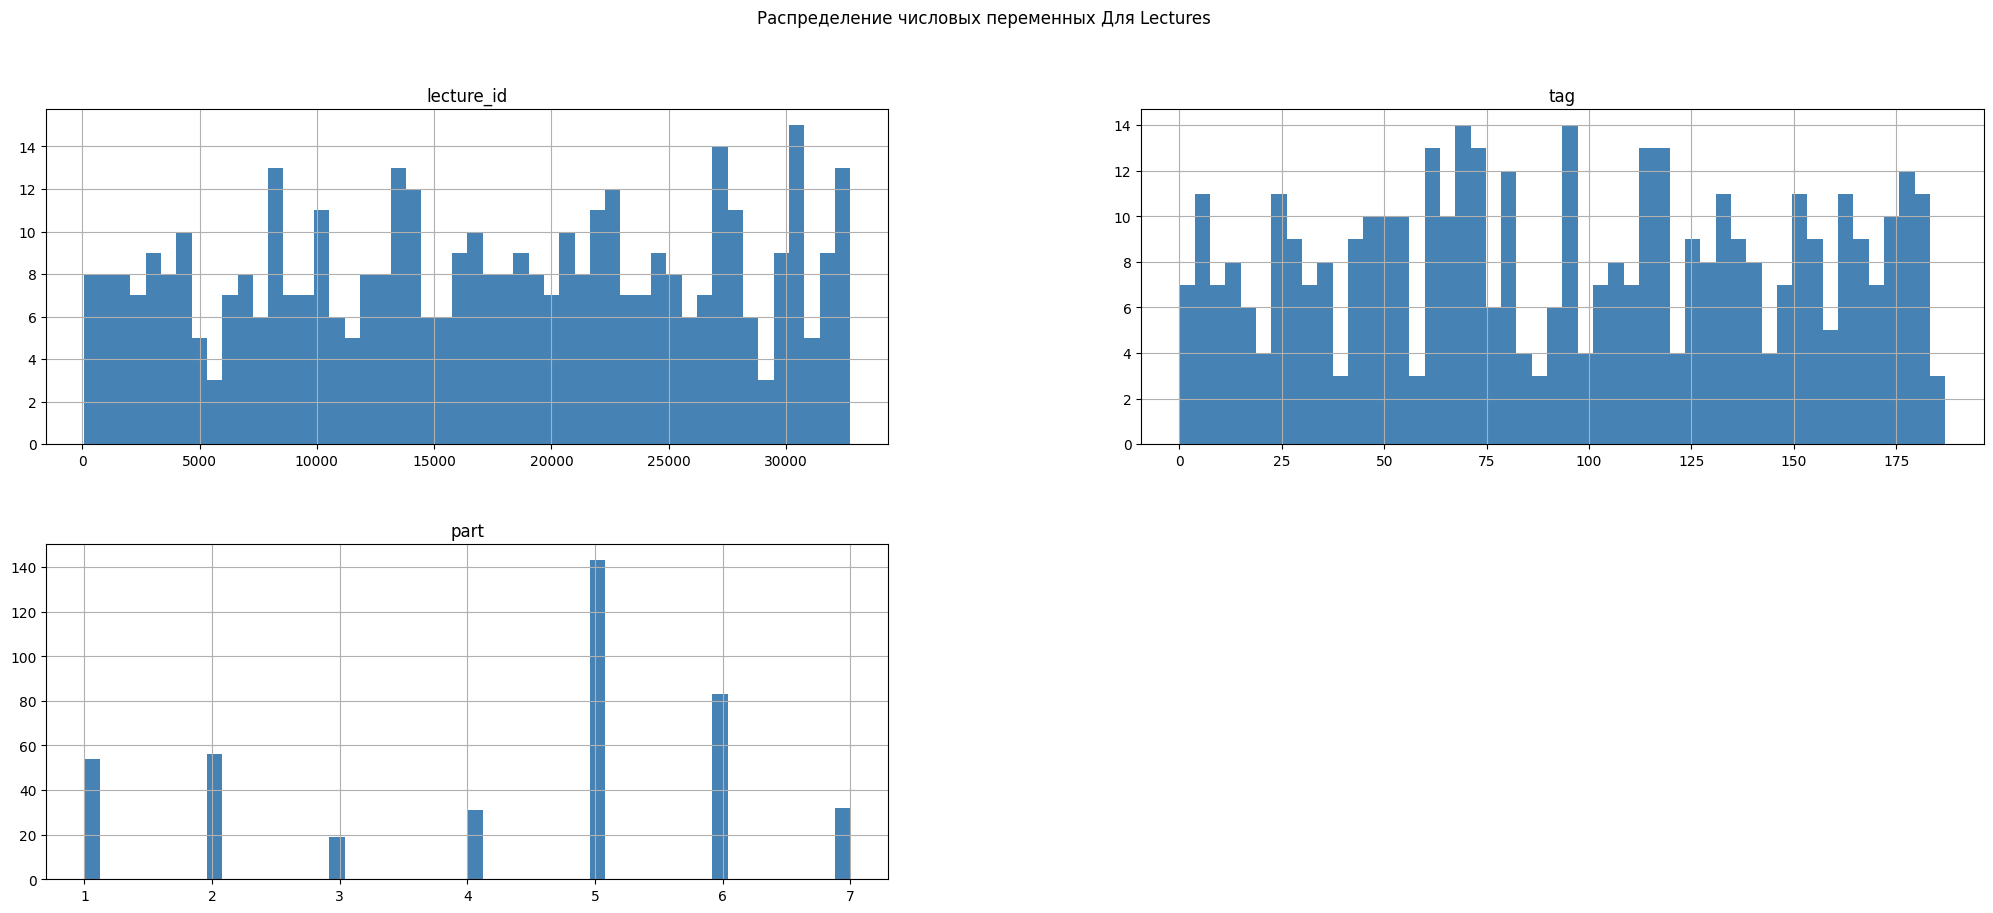

In [70]:
lectures.hist(bins=50, figsize=(25, 10), color='steelblue')
plt.suptitle('Распределение числовых переменных Для Lectures')
plt.show()

# Шаг 3: Анализ характеристик

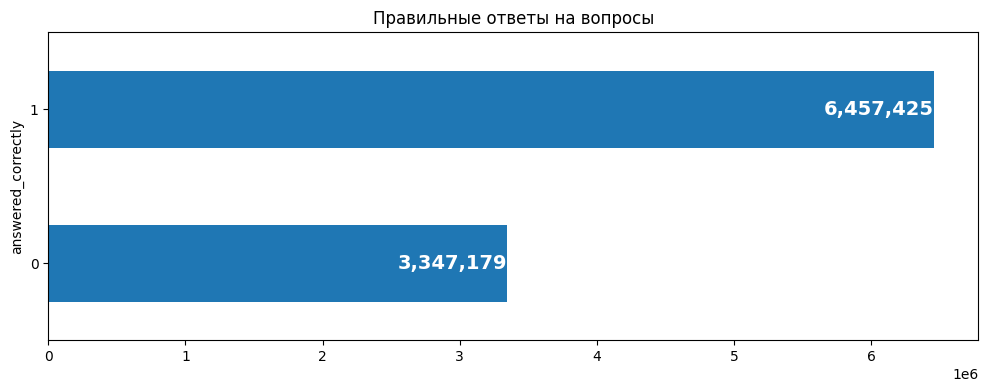

In [57]:
# Правильные ответы на вопросы
correct = train[train.answered_correctly != -1].answered_correctly.value_counts(ascending=True)

fig = plt.figure(figsize=(12,4))
correct.plot.barh()
for i, v in zip(correct.index, correct.values):
    plt.text(v, i, '{:,}'.format(v), color='white', fontweight='bold', fontsize=14, ha='right', va='center')
plt.title("Правильные ответы на вопросы")
plt.xticks(rotation=0)
plt.show()

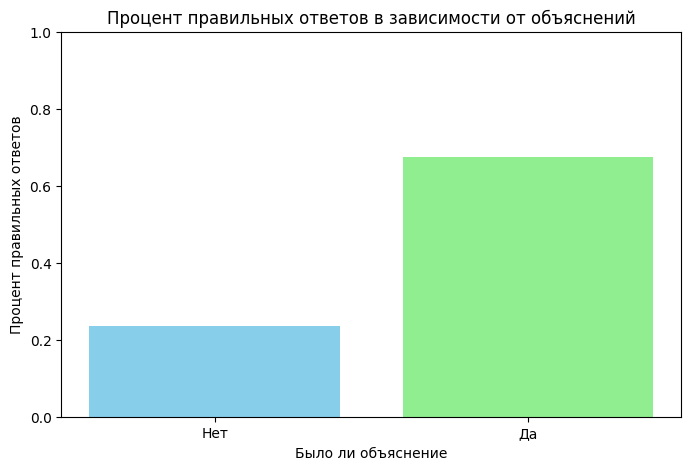

In [41]:
# Процент правильных ответов в зависимости от объяснений
plt.figure(figsize=(8, 5))
plt.bar([0, 1], explanation_correctness.values, color=['skyblue', 'lightgreen'])
plt.title('Процент правильных ответов в зависимости от объяснений')
plt.xlabel('Было ли объяснение')
plt.ylabel('Процент правильных ответов')
plt.xticks([0, 1], ['Нет', 'Да'])  # Подписи для оси X
plt.ylim(0, 1)  # Лимиты для оси Y, чтобы показать долю правильных ответов от 0 до 1
plt.show()

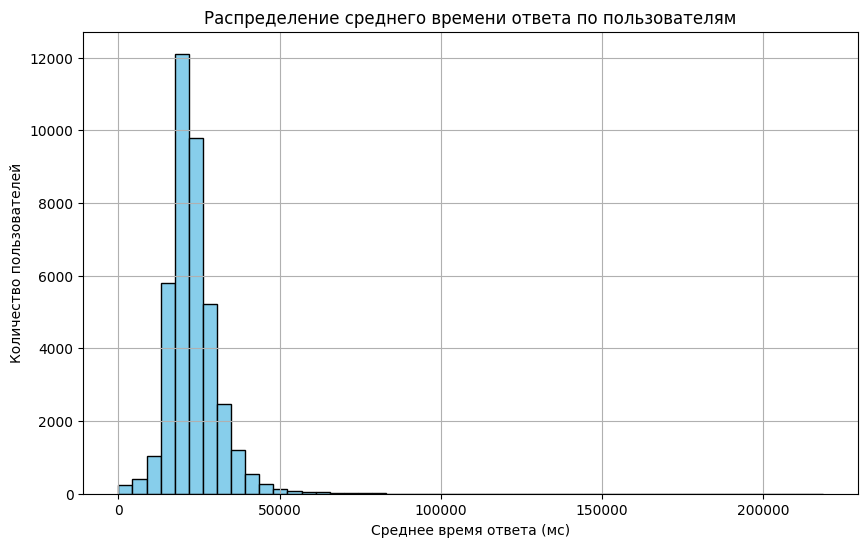

In [43]:
# Группируем данные по 'user_id' и вычисляем среднее время на ответ
user_avg_time = train.groupby('user_id')['prior_question_elapsed_time'].mean()

# Построение гистограммы для среднего времени ответа по пользователям
plt.figure(figsize=(10, 6))
plt.hist(user_avg_time, bins=50, color='skyblue', edgecolor='black')
plt.title('Распределение среднего времени ответа по пользователям')
plt.xlabel('Среднее время ответа (мс)')
plt.ylabel('Количество пользователей')
plt.grid(True)
plt.show()

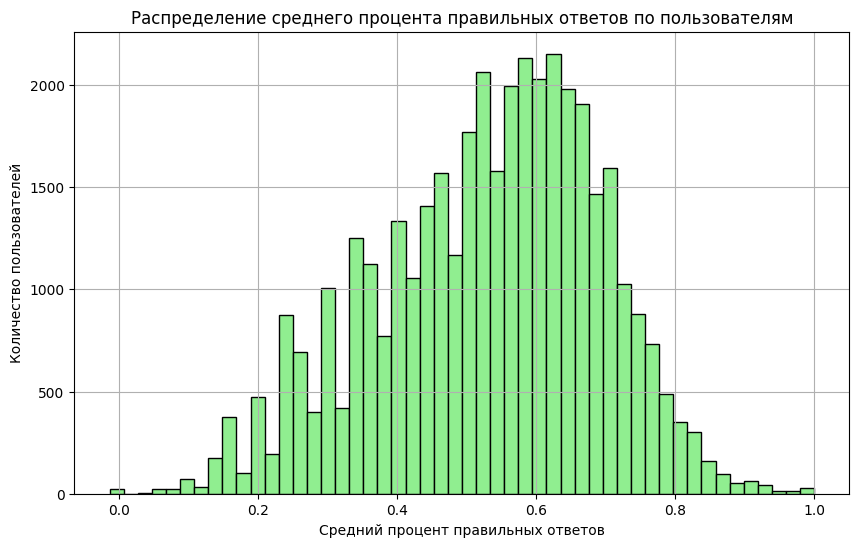

In [44]:
# Группируем данные по 'user_id' и вычисляем средний процент правильных ответов для каждого пользователя
user_accuracy = train.groupby('user_id')['answered_correctly'].mean()

# Построение гистограммы для среднего процента правильных ответов по пользователям
plt.figure(figsize=(10, 6))
plt.hist(user_accuracy, bins=50, color='lightgreen', edgecolor='black')
plt.title('Распределение среднего процента правильных ответов по пользователям')
plt.xlabel('Средний процент правильных ответов')
plt.ylabel('Количество пользователей')
plt.grid(True)
plt.show()

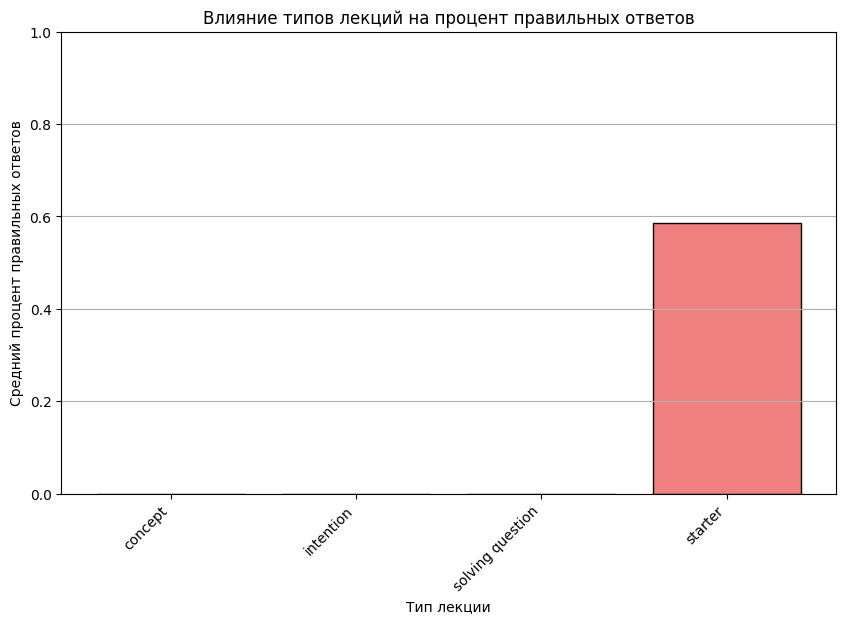

In [45]:
# Группируем данные по типу лекций и вычисляем средний процент правильных ответов
lecture_effect = train.groupby('type_of')['answered_correctly'].mean()

# Построение столбчатой диаграммы для влияния типов лекций
plt.figure(figsize=(10, 6))
plt.bar(lecture_effect.index, lecture_effect.values, color='lightcoral', edgecolor='black')
plt.title('Влияние типов лекций на процент правильных ответов')
plt.xlabel('Тип лекции')
plt.ylabel('Средний процент правильных ответов')
plt.xticks(rotation=45, ha='right')  # Поворачиваем подписи оси X для лучшего отображения
plt.ylim(0, 1)  # Лимит от 0 до 1 на оси Y, так как это проценты
plt.grid(True, axis='y')  # Добавляем сетку для оси Y
plt.show()

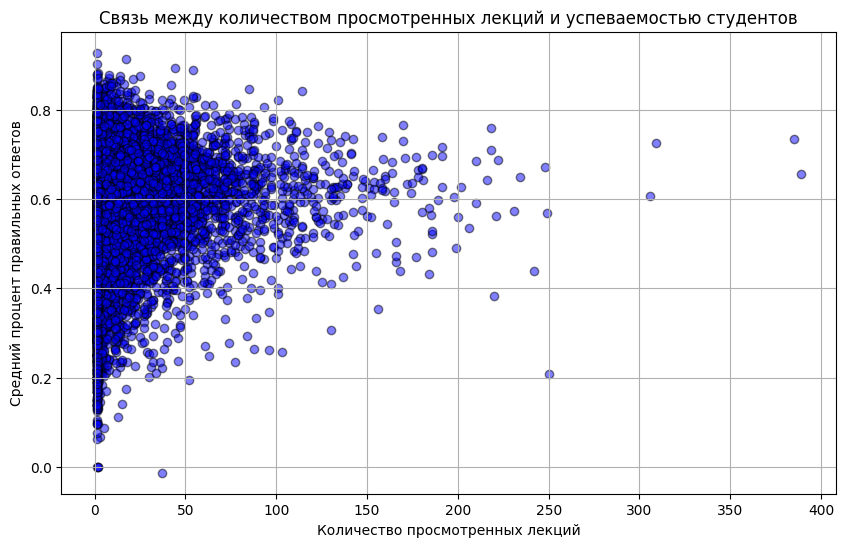

In [47]:

# Фильтруем строки, где контент - это лекции (content_type_id == 1)
lectures_only = train[train['content_type_id'] == 1]

# Рассчитываем количество просмотренных лекций для каждого пользователя
lecture_counts = lectures_only.groupby('user_id')['lecture_id'].count()

# Рассчитываем средний процент правильных ответов для каждого пользователя
user_success = train.groupby('user_id')['answered_correctly'].mean()

# Создаём DataFrame для удобства работы с данными
data = pd.DataFrame({
    'lecture_counts': lecture_counts,
    'user_success': user_success
}).dropna()  # Удаляем строки с пропусками

# Строим диаграмму рассеяния
plt.figure(figsize=(10, 6))
plt.scatter(data['lecture_counts'], data['user_success'], alpha=0.5, color='blue', edgecolor='black')
plt.title('Связь между количеством просмотренных лекций и успеваемостью студентов')
plt.xlabel('Количество просмотренных лекций')
plt.ylabel('Средний процент правильных ответов')
plt.grid(True)
plt.show()

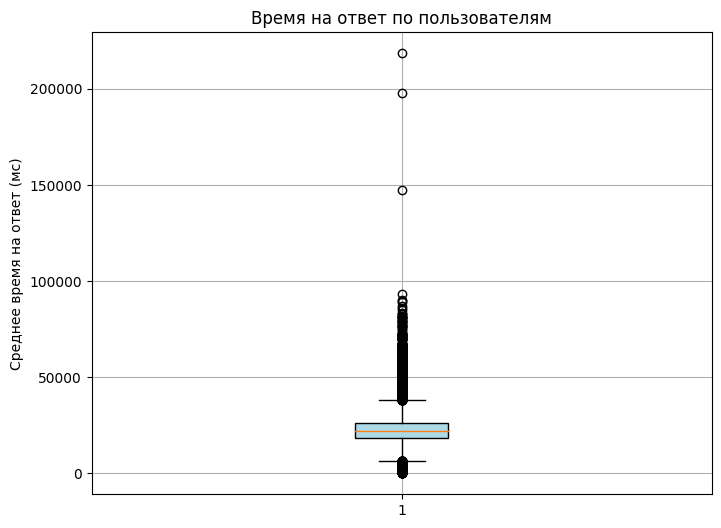

In [53]:
# Время на ответ по пользователям
user_time = train.groupby('user_id')['prior_question_elapsed_time'].mean().dropna()
plt.figure(figsize=(8, 6))
plt.boxplot(user_time, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Время на ответ по пользователям')
plt.ylabel('Среднее время на ответ (мс)')
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

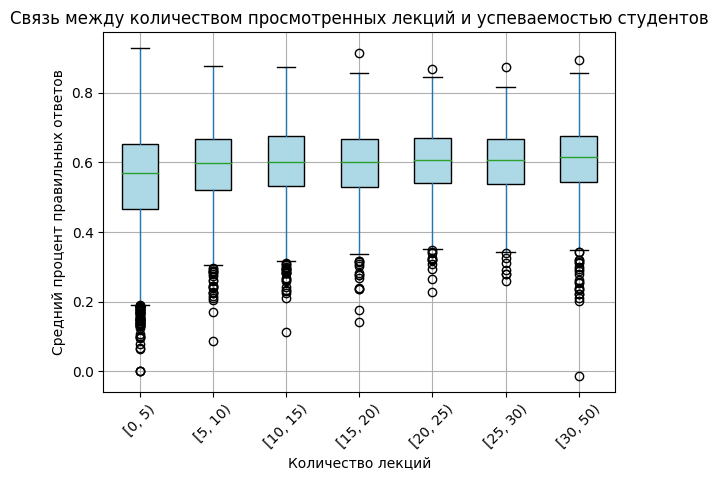

In [58]:

# Фильтруем строки, где контент - это лекции (content_type_id == 1)
lectures_only = train[train['content_type_id'] == 1]

# Рассчитываем количество просмотренных лекций для каждого пользователя
lecture_counts = lectures_only.groupby('user_id')['lecture_id'].count()

# Рассчитываем средний процент правильных ответов для каждого пользователя
user_success = train.groupby('user_id')['answered_correctly'].mean()

# Создаем DataFrame с количеством лекций и успеваемостью
data = pd.DataFrame({
    'lecture_counts': lecture_counts,
    'user_success': user_success
}).dropna()  # Удаляем строки с пропусками

# Разбиваем пользователей на группы по количеству лекций
bins = [0, 5, 10, 15, 20, 25, 30, 50]  # Группируем по диапазонам лекций
data['lecture_bins'] = pd.cut(data['lecture_counts'], bins=bins, right=False)

# Построение боксплота
plt.figure(figsize=(10, 6))
data.boxplot(column='user_success', by='lecture_bins', patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Связь между количеством просмотренных лекций и успеваемостью студентов')
plt.suptitle('')
plt.xlabel('Количество лекций')
plt.ylabel('Средний процент правильных ответов')
plt.xticks(rotation=45)  # Поворот меток оси X для лучшего отображения
plt.grid(True)
plt.show()

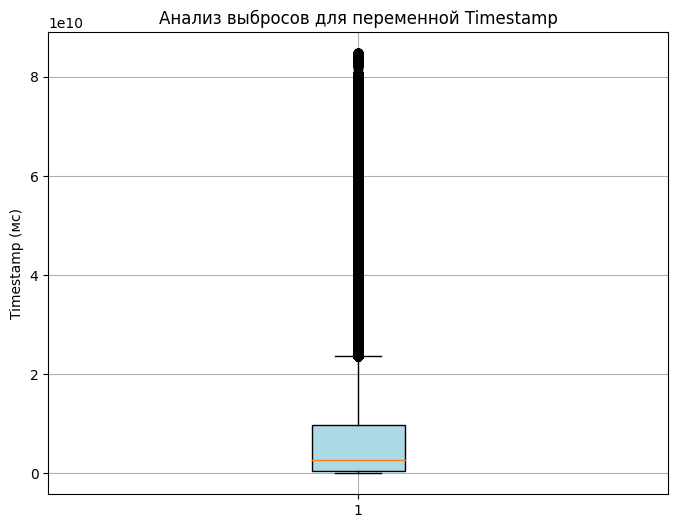

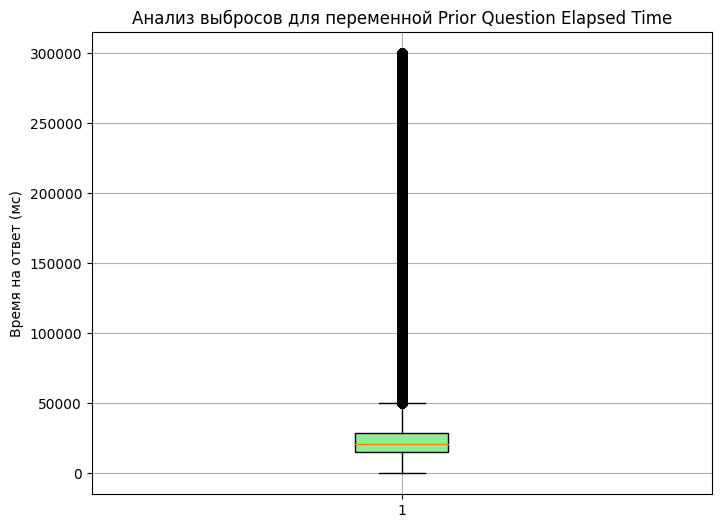

In [78]:
# Боксплот для переменной timestamp
plt.figure(figsize=(8, 6))
plt.boxplot(train['timestamp'], patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Анализ выбросов для переменной Timestamp')
plt.ylabel('Timestamp (мс)')
plt.grid(True)
plt.show()
# Боксплот для переменной prior_question_elapsed_time
plt.figure(figsize=(8, 6))
plt.boxplot(train['prior_question_elapsed_time'].dropna(), patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Анализ выбросов для переменной Prior Question Elapsed Time')
plt.ylabel('Время на ответ (мс)')
plt.grid(True)
plt.show()